# 의약품처방정보
* https://www.data.go.kr/data/15007117/fileData.do
* 의약품처방정보는 2002년부터의 국민건강보험 가입자 중 의약품처방이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 의약품처방전별 개별 의약품에 대한 처방내역(요양개시일자, 1회투약량, 1일투약량, 총투여일수 등)으로 구성된 개방데이터이다.
* 약품일반성분명코드 : http://www.hira.or.kr/rf/medicine/getHistoryList.do?pgmid=HIRAA030035020000
* <img src="https://i.imgur.com/hsrpJp4.png">

# 과제

* 약품코드 하나를 정해서 실습에서 분석했던 것처럼 분석해 주세요.
* 데이터 추출은 **0301-NHIS_medicine_ursa_exract.ipynb 파일을 참고해서 1종의 약품코드**를 추출해서 분석해 주세요.

## 주제: 라니티딘 사태 이전, 이후 처방 분석

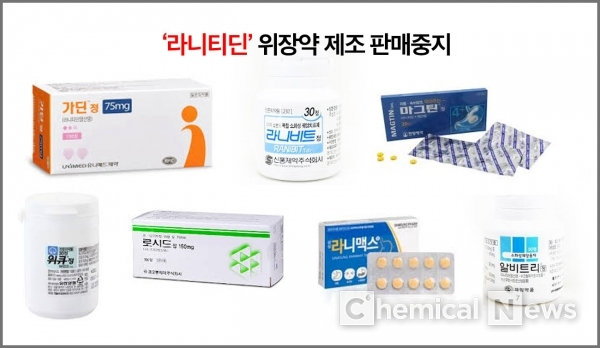

In [3]:
from IPython.display import Image
Image(filename='라니티딘.jpg')

### Ranitidine은 가격이 저렴하고 부작용이 적어 많이 사용되던 위산 분비 억제제입니다.  
* **H2 blocker**: histamine을 경쟁적으로 억제하여 위산 분비 억제
* 적응증: 위·십이지장궤양, 졸링거-엘리슨증후군, 역류성식도염, 마취전 투약(멘델슨증후군 예방), 수술후 궤양, 비스테로이드소염진통제(NSAID) 투여로 인한 위·십이지장궤양
2) 다음 질환의 위점막 병변(미란, 출혈, 발적, 부종)의 개선 : 급성위염, 만성위염의 급성악화기, 상부소화관출혈(소화성 궤양, 급성스트레스궤양, 급성위점막병변에 의한)

### 미국 FDA는 Ranitidine에서 2019년 9월 13일 발암물질 NDMA가 검출되었다고 발표했습니다.
* NDMA: N-Nitrosodimethylamie
* 현재로서는 라니티딘에 포함되어 있는 ‘아질산염’과 ‘디메틸아민기’가 특정 조건에서 자체적으로 분해, 결합하여 생성되거나, 제조과정 중 아질산염이 비의도적으로 혼입되어 생성된 것으로 추정하고 있음

### 발표 이후 Ranitidine이 포함되어 있는 약 목록 269개가 즉시 공개되었고, Ranitidine은 빠르게 퇴출되었습니다.
* 퇴출된 이후 대체될 수 있는 많은 **H2 blocker, PPI(Proton Pump Inhibitor), P-CAB(Potassium-Competitive acid blocker)**가 적극적으로 품목허가를 받았습니다.

[**'라니티딘 사태 풍선효과...대체약물 192개 신규진입'**] https://www.dailypharm.com/Users/News/NewsView.html?ID=268991

### 라이브러리로드

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

### 시각화를 위한 한글폰트 설정

In [85]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"


# 그래프 스타일 설정
# plt.style.use("ggplot")
sns.set_style("whitegrid")
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [58]:
from IPython.display import set_matplotlib_formats
# 레티나 설정을 해주면 레티나를 지원하는 디스플레이에서 글씨가 좀 더 선명하게 보입니다.
set_matplotlib_formats('retina')

## 01. 데이터 전처리

국내에서 처방이 가장 많았던 Ranitidine 성분 전문의약품은 **대웅제약의 "알비스정"**이었습니다.  
* 알비스정의 약품 일반 성분명코드: 631800ATB

비교할 약물은 **HK이노엔의 "케이캡정"**입니다.
* 케이캡정의 약품 일반 성분명코드: 675801ATB
* 성분: Tegoprazan (P-CAB)

2019년 의약품처방정보 데이터에서 **알비스정**과 **케이캡정**의 처방 정보만 추출합니다.

In [36]:
# 2019년 의약품처방정보에서 약품일반성분명코드가 '631800ATB'만 추출
def find_drug(year, part):
    if year > 2015:
        file_name = f"data/open_drug/T60_{year}_1백만_{part}.csv"           # 읽어올 파일, directory 설정
    else:
        file_name = f"open_drug/NHIS_OPEN_T60_{year}_part{part}.csv"
    
    nhis = pd.read_csv(file_name, encoding='cp949')
    ursa = nhis[
        nhis["약품일반성분명코드"].isin(["631800ATB", "675801ATB"]          # 알비스정(631800ATB), 케이캡정(675801ATB)만 추출
        )]
    
    ursa.to_csv(f"data/albis_{year}_{part}.csv", index=False)              # data 폴더에 csv 파일 저장
    return file_name, ursa.shape

In [37]:
for i in range(1, 4):
    find_drug(2019, i)

In [38]:
def get_file_list_by_year(year):
    file_list = []
    for root, dirs, files in os.walk("data/"):
        for filename in files:
            # 파일명이 "albis" 로 시작하는 것만 가져오기
            if filename.startswith(f'albis_{year}'):
                file_list.append(filename)
    return sorted(file_list)

get_file_list_by_year(2019)

['albis_2019_1.csv', 'albis_2019_2.csv', 'albis_2019_3.csv']

In [39]:
def concat_data(year):
    df_lists = []
    # 파일별로 데이터를 가져옵니다.
    files = get_file_list_by_year(year)
    for filename in sorted(files):
        # 파일을 읽어옵니다.
        df_temp = pd.read_csv(f'data/{filename}')
        # 해당 데이터프레임이 비어있지 않다면 병합하기 위해 리스트에 담습니다.
        if not df_temp.empty :
            print(filename, df_temp.shape)
            df_lists.append(df_temp)
    # 리스트가 비어있지 않다면 데이터프레임을 합쳐줍니다.
    if df_lists :    
        df = pd.concat(df_lists)
    return df        

In [40]:
df = concat_data(2019)
df.head()

albis_2019_1.csv (34562, 15)
albis_2019_2.csv (34608, 15)
albis_2019_3.csv (29819, 15)


,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2019,5,109211144,2,1,14,28,20190507,631800ATB,1.0,2,7,392.0,5488,20201222
1,2019,9,101375121,1,2,8,26,20190621,631800ATB,1.0,2,5,390.0,3900,20201222
2,2019,19,101693481,5,1,6,11,20190105,631800ATB,1.0,2,5,390.0,3900,20201222
3,2019,20,101131103,1,2,11,41,20190422,675801ATB,1.0,1,15,1300.0,19500,20201222
4,2019,20,102153784,1,2,11,41,20191127,675801ATB,1.0,1,30,1300.0,39000,20201222


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98989 entries, 0 to 29818
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         98989 non-null  int64  
 1   가입자 일련번호     98989 non-null  int64  
 2   처방내역일련번호     98989 non-null  int64  
 3   일련번호         98989 non-null  int64  
 4   성별코드         98989 non-null  int64  
 5   연령대코드(5세단위)  98989 non-null  int64  
 6   시도코드         98989 non-null  int64  
 7   요양개시일자       98989 non-null  int64  
 8   약품일반성분명코드    98989 non-null  object 
 9   1회 투약량       98989 non-null  float64
 10  1일투약량        98989 non-null  int64  
 11  총투여일수        98989 non-null  int64  
 12  단가           98989 non-null  float64
 13  금액           98989 non-null  int64  
 14  데이터 공개일자     98989 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 12.1+ MB


"요양개시일자" 컬럼의 데이터 type을 datetime으로 변경하고, 연, 월을 추출하겠습니다.

In [42]:
df['요양개시일자'] = pd.to_datetime(df['요양개시일자'].astype(str))

df['연도'] = df['요양개시일자'].dt.year
df['월'] = df['요양개시일자'].dt.month

df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,연도,월
0,2019,5,109211144,2,1,14,28,2019-05-07,631800ATB,1.0,2,7,392.0,5488,20201222,2019,5
1,2019,9,101375121,1,2,8,26,2019-06-21,631800ATB,1.0,2,5,390.0,3900,20201222,2019,6
2,2019,19,101693481,5,1,6,11,2019-01-05,631800ATB,1.0,2,5,390.0,3900,20201222,2019,1
3,2019,20,101131103,1,2,11,41,2019-04-22,675801ATB,1.0,1,15,1300.0,19500,20201222,2019,4
4,2019,20,102153784,1,2,11,41,2019-11-27,675801ATB,1.0,1,30,1300.0,39000,20201222,2019,11


약품일반성분명코드, 성별코드, 연령대코드, 시도코드를 mapping된 값으로 변경하겠습니다.

In [43]:
# 약품일반성분명코드
drugs_dict = {'631800ATB': '알비스정', '675801ATB': '케이캡정'}

df['상품명'] = df['약품일반성분명코드'].map(drugs_dict)

In [44]:
# 성별코드
sex = {1: '남자', 2: '여자'}

df['성별'] = df['성별코드'].map(sex)

In [49]:
age_code.split(",")

['1 00~04세',
 ' 2 05~09세',
 ' 3 10~14세',
 ' 4 15~19세',
 ' 5 20~24세',
 ' 6 25~29세',
 ' 7 30~34세',
 '\n8 35~39세',
 ' 9 40~44세',
 ' 10 45~49세',
 ' 11 50~54세',
 ' 12 55~59세',
 ' 13 60~64세',
 ' 14 65~69세',
 ' 15 70~74세',
 ' 16 75~79세',
 '\n17 80~84세',
 ' 18 85세+']

In [54]:
# 연령대코드(5세단위)
age_code = """1 00~04세 
2 05~09세
3 10~14세
4 15~19세
5 20~24세
6 25~29세
7 30~34세
8 35~39세
9 40~44세
10 45~49세
11 50~54세
12 55~59세
13 60~64세
14 65~69세
15 70~74세
16 75~79세
17 80~84세
18 85세+"""

age_list = age_code.split("\n")
age_dict = {}
for age_pair in age_list:
    first = int(age_pair.split(' ')[0])
    last = age_pair.split(' ')[1]
    age_dict[first] = last
    
df['연령대'] = df['연령대코드(5세단위)'].map(age_dict)

In [51]:
# 시도코드
city = """11 서울특별시
42 강원도
26 부산광역시
43 충청북도
27 대구광역시
44 충청남도
28 인천광역시
45 전라북도
29 광주광역시
46 전라남도
30 대전광역시
47 경상북도
31 울산광역시
48 경상남도
36 세종특별자치시
49 제주특별자치도
41 경기도"""

city_list = city.split("\n")
city_name = {}
for city_info in city_list:
    first = int(city_info.split(' ')[0])
    last = city_info.split(' ')[1]
    city_name[first] = last
    
df['시도'] = df['시도코드'].map(city_name)

In [59]:
pd.options.display.max_columns = None

df.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,연도,월,상품명,성별,연령대,시도
0,2019,5,109211144,2,1,14,28,2019-05-07,631800ATB,1.0,2,7,392.0,5488,20201222,2019,5,알비스정,남자,65~69세,인천광역시
1,2019,9,101375121,1,2,8,26,2019-06-21,631800ATB,1.0,2,5,390.0,3900,20201222,2019,6,알비스정,여자,35~39세,부산광역시
2,2019,19,101693481,5,1,6,11,2019-01-05,631800ATB,1.0,2,5,390.0,3900,20201222,2019,1,알비스정,남자,25~29세,서울특별시
3,2019,20,101131103,1,2,11,41,2019-04-22,675801ATB,1.0,1,15,1300.0,19500,20201222,2019,4,케이캡정,여자,50~54세,경기도
4,2019,20,102153784,1,2,11,41,2019-11-27,675801ATB,1.0,1,30,1300.0,39000,20201222,2019,11,케이캡정,여자,50~54세,경기도


## 02. 탐색적 데이터 분석

In [128]:
df.describe(include='object')

,약품일반성분명코드,상품명,성별,연령대,시도
count,98989,98989,98989,98989,98989
unique,2,2,2,17,17
top,631800ATB,알비스정,여자,60~64세,경기도
freq,61590,61590,57909,11946,24763


In [114]:
# 상품명에 따른 총투여일수 비교
df.groupby('상품명')['총투여일수'].describe()

,count,mean,std,min,25%,50%,75%,max
상품명,,,,,,,,
알비스정,61590.0,12.275678,19.048013,1.0,3.0,7.0,14.0,365.0
케이캡정,37399.0,12.756304,12.866723,1.0,5.0,7.0,14.0,220.0


상품명에 따라서 **투여일수의 평균 및 분포는 유사**하나 **max값에서 차이**가 있습니다.

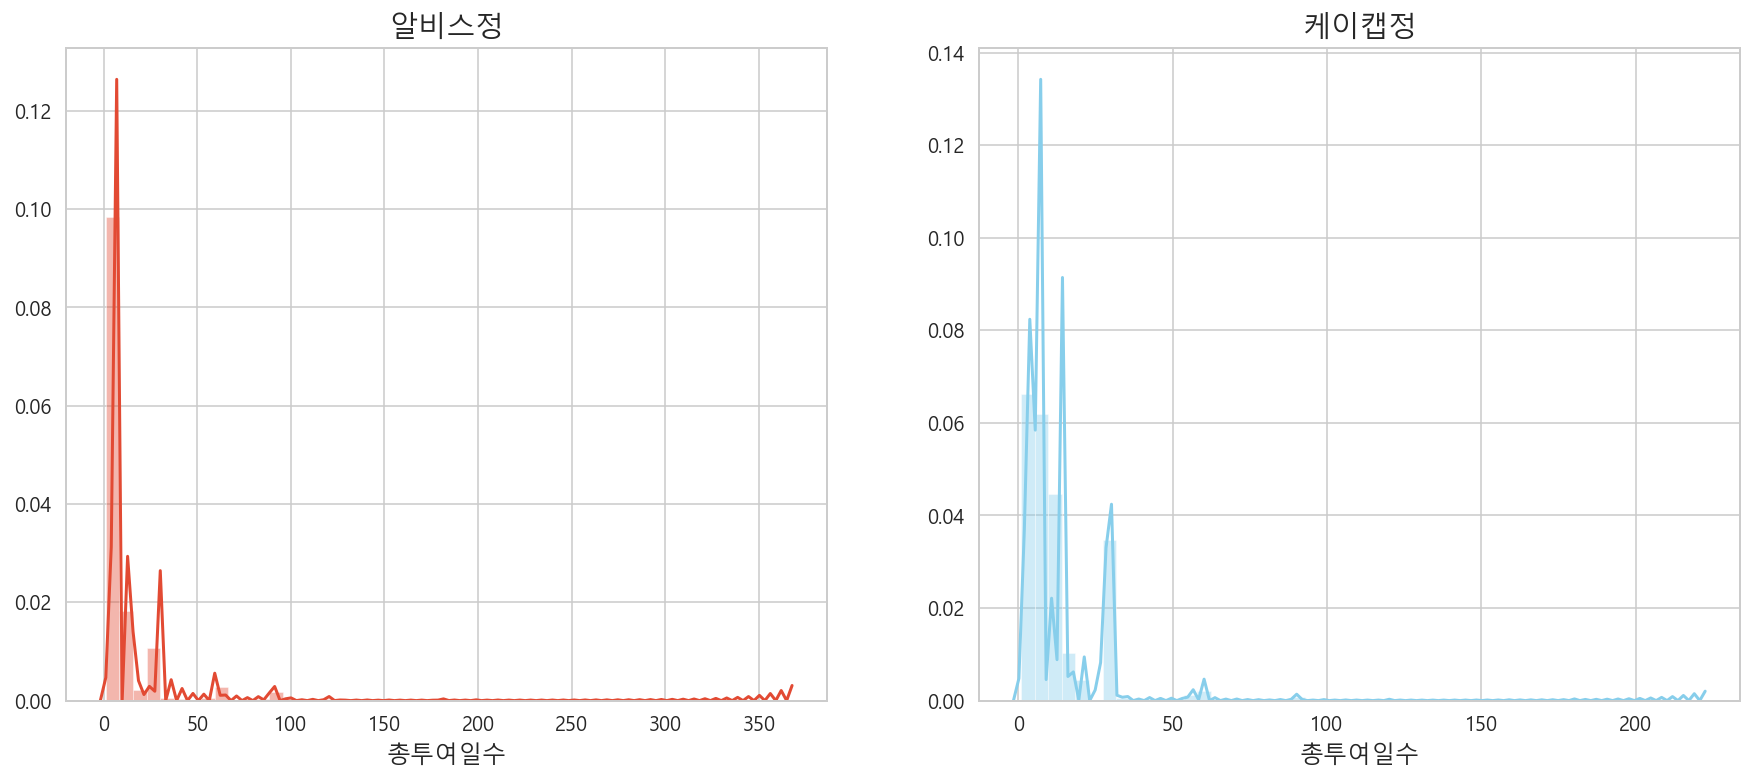

In [124]:
# sns.boxplot(data=df, x='상품명', y='총투여일수')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
g1 = sns.distplot(df.loc[df['상품명'] == '알비스정', '총투여일수'], ax=ax1)
g2 = sns.distplot(df.loc[df['상품명'] == '케이캡정', '총투여일수'], color='skyblue', ax=ax2)
g1.set(title='알비스정'); g2.set(title='케이캡정')
plt.show()

In [125]:
# 알비스정 중에 총 투여일수가 큰 데이터 확인
df[(df['상품명'] == '알비스정') & (df['총투여일수'] > 250)]

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,연도,월,상품명,성별,연령대,시도
2910,2019,29944,102030347,2,2,15,44,2019-05-15,631800ATB,1.0,2,365,390.0,284700,20201222,2019,5,알비스정,여자,70~74세,충청남도
786,2019,357648,109374493,2,1,15,41,2019-04-16,631800ATB,1.0,1,290,390.0,113100,20201222,2019,4,알비스정,남자,70~74세,경기도
21450,2019,566177,107123755,2,1,18,11,2019-06-18,631800ATB,1.0,2,364,390.0,283920,20201222,2019,6,알비스정,남자,85세+,서울특별시


알비스정을 처방받은 환자 중 총 투여일수가 큰 것들의 데이터는 위와 같고  
연령대가 높은 것으로 보아 **연령이 총 투여일수에 영향을 준 것**으로 생각됩니다.

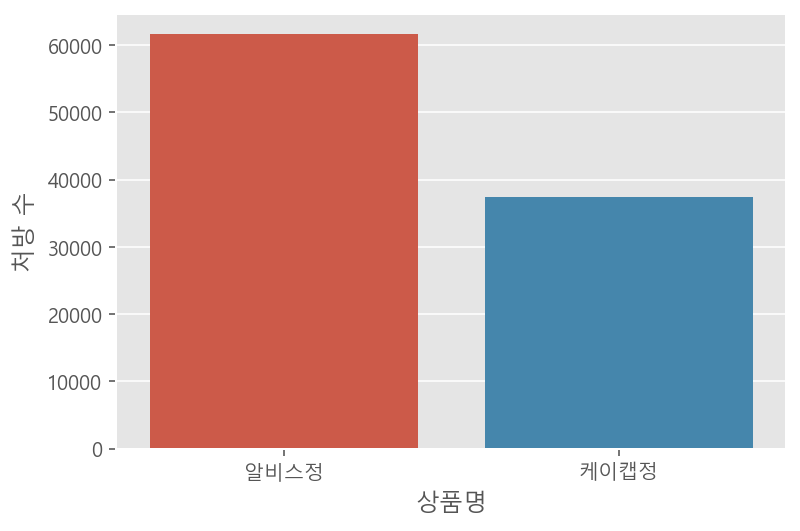

In [71]:
ax = sns.countplot(data=df, x='상품명')
ax.set(ylabel='처방 수')
plt.show()

2019년 전체로 보았을 때는 알비스정(Ranitidine)이 케이캡정(Tegoprazan)보다 많습니다.  
월 별로 보겠습니다.

In [1]:
pre_by_month_df = pd.pivot_table(data=df, columns = '상품명', index='연', values='처방내역일련번호', aggfunc='count').reset_index().melt(id_vars='월')
pre_by_month_df

NameError: name 'pd' is not defined

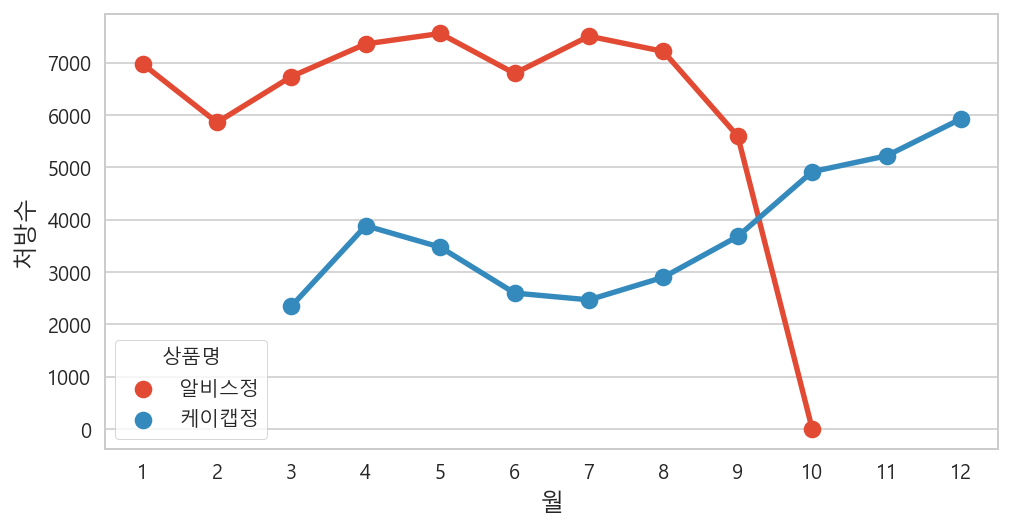

In [88]:
# 월별에 따른 처방 수 확인 (알비스정 vs 케이캡정)
plt.figure(figsize=(8, 4))

g = sns.pointplot(data=pre_by_month_df, x='월', y='value', hue='상품명')
g.set(ylabel='처방수')
plt.show()

FDA가 Ranitidine의 NDMA에 대해 발표한 것이 **9월 13일**이었기 때문에  
알비스정이 **9월에 감소**하고 **10월에 급격히 감소**하여 **11월부터는 처방이 없는 것**을 볼 수 있습니다.

이에 반해 **케이캡정**은 8월부터 꾸준히 상승하는 걸 볼 수 있습니다.  
3월부터 등장하였는데 시판허가는 2018년 7월5일에 받았지만, **2019년 3월1일 급여목록에 등재**되었기 때문입니다.

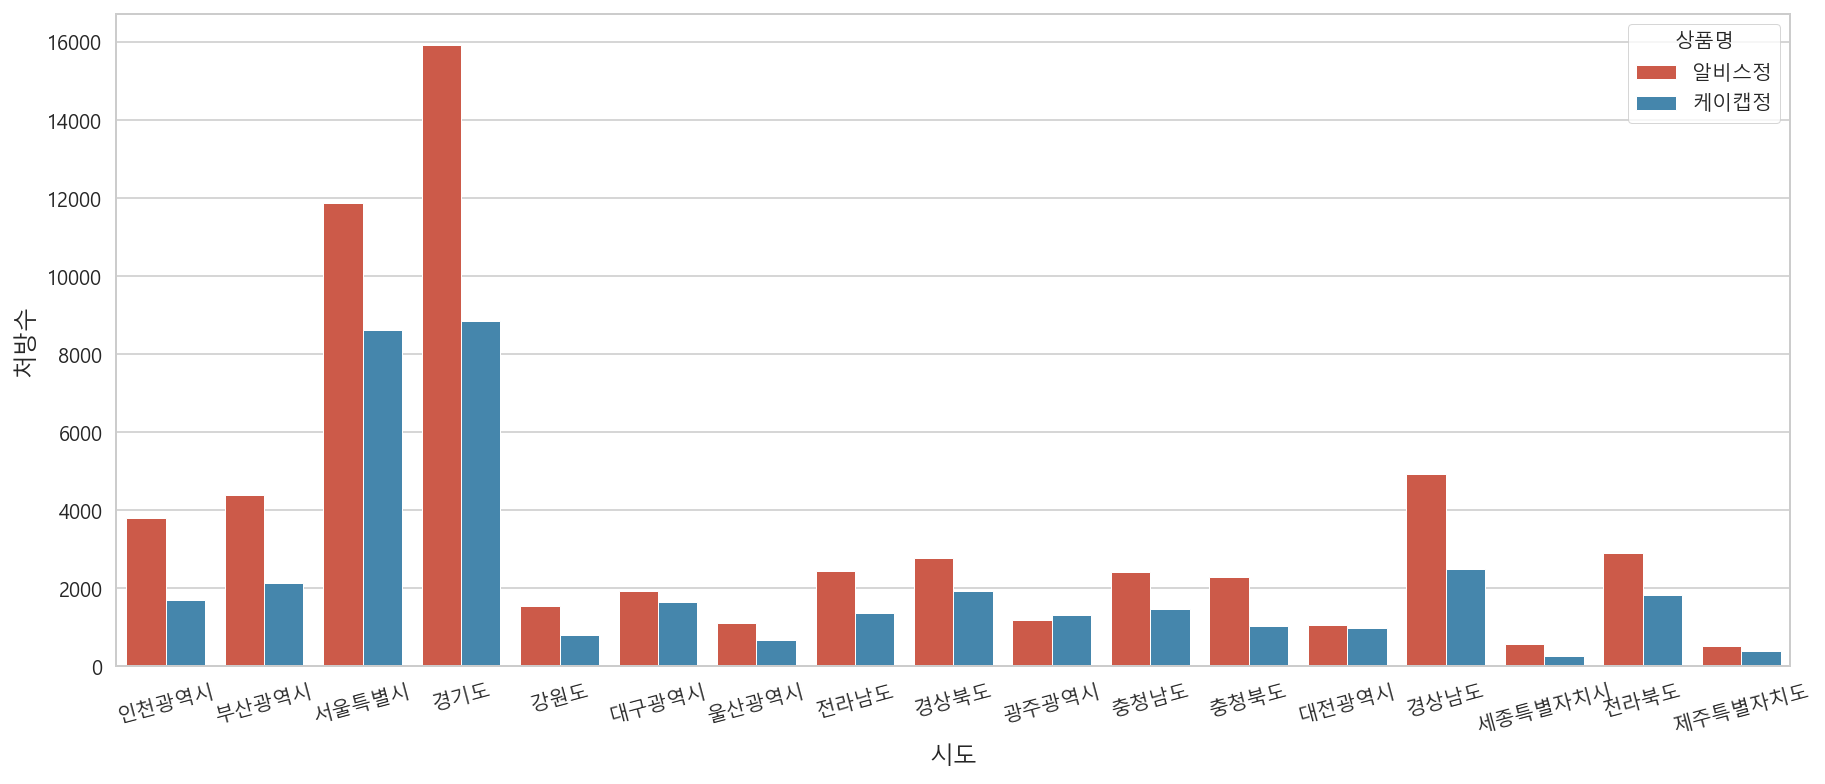

In [96]:
# 처방 지역에 따른 차이
plt.figure(figsize=(15, 6))
g = sns.countplot(data=df, x='시도', hue='상품명')
g.set(ylabel='처방수')
g.set_xticklabels(g.get_xticklabels(), rotation=15)
plt.show()

지역에 따라서는 유의미한지 평가하기 위해서 다른 데이터가 필요합니다.

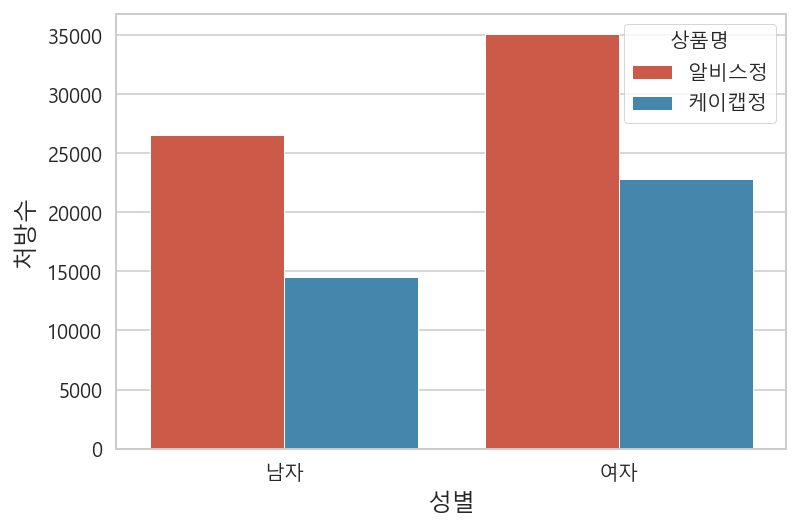

In [98]:
# 성별에 따른 처방 정보 차이
g = sns.countplot(data=df, x='성별', hue='상품명')
g.set(ylabel='처방수')
plt.show()

성별에 따른 차이는 여성이 남성보다 높습니다.  
이는 **적응증을 고려했을 때 아래 근거들로 설명할 수 있으나, 더 자세한 정보가 필요**한 것으로 보입니다.
* 역류성 식도염은 남성의 유병률이 높지만(10.6% vs. 2.0%), 증상 있는 위식도역류질환은 여성의 유병률이 높음 (6.2% vs. 2.5%)
* 많은 연구에서 여성보다 남성에서 소화성 궤양의 유병률이 높다고 알려져 있음
* 국내 연구 중 성별 차이가 유의하지 않다는 결과도 있음

참조: 
1. Kim SY, Jung HK, Lim J, Kim TO, Choe AR, Tae CH, Shim KN, Moon CM, Kim SE, Jung SA.  Gender Specific Differences in Prevalence and Risk Factors for Gastro-Esophageal Reflux Disease. J Korean Med Sci. 2019 June 3;34(21):e158  
2. Kurata JH, Nogawa AN. Meta-analysis of risk factors for peptic ulcer. Nonsteroidal antiinflammatory drugs, Helicobacter pylori, and smoking. J Clin Gastroenterol 1997; 24: 2-17  
3. . Chou SP. An examination of the alcohol consumption and peptic ulcer association-results of a national survey. Alcohol Clin Exp Res 1994; 18: 149-53
4. 강주원, 이정선, 배강민. 소화성 궤양과 위험인자들과의 연관성. KJFP. June 24, 2016

In [103]:
pre_by_age_df = pd.pivot_table(data=df, columns='상품명', index='연령대코드(5세단위)', values='처방내역일련번호', aggfunc='count').reset_index().melt(id_vars='연령대코드(5세단위)')
pre_by_age_df

,연령대코드(5세단위),상품명,value
0,2,알비스정,27
1,3,알비스정,426
2,4,알비스정,1394
3,5,알비스정,2114
4,6,알비스정,2922
5,7,알비스정,3048
6,8,알비스정,3851
7,9,알비스정,4181
8,10,알비스정,5438
9,11,알비스정,6313


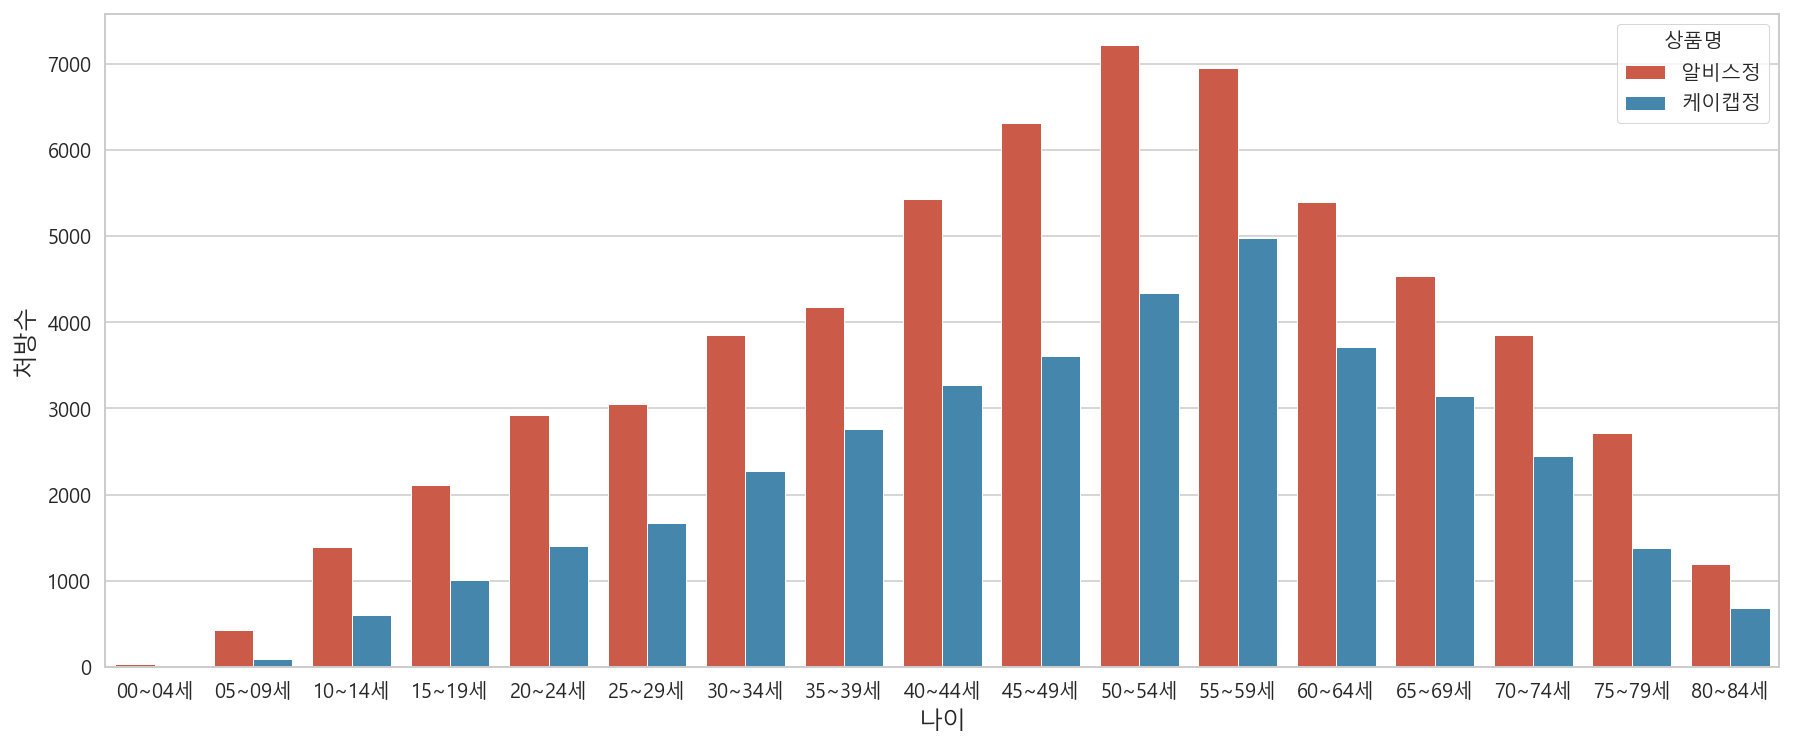

In [112]:
# 연령에 따른 처방 수
plt.figure(figsize=(15, 6))
g = sns.barplot(data=pre_by_age_df, x='연령대코드(5세단위)', y='value', hue='상품명')
g.set(xlabel='나이', ylabel='처방수')
g.set_xticklabels(age_dict.values())
plt.show()

55\~59세 구간에서 50\~55세와 비교하여 알비스정은 감소하지만 케이캡정은 증가하는 점 외에는 경향성이 유사해 보입니다.  
50\~60세 구간의 처방 수가 가장 많은데 위궤양이 45\~55세가 많고 역류성 식도염이 50대와 60대가 가장 많은 것을 고려하면  
**국내 적응증의 유병률과 거의 일치하는 결과**를 보입니다.